    
### Data Wrangling - (Assessing and Cleaning Data)

We are working with the [Travel Times](https://www.kaggle.com/datasets/minnieliang/travel-times-data?select=travel_times.csv) data from Kaggle.com.
The data is a CSV file of various cars' travel times and data corresponding to these travels. Corresponding data includes max and avg speed, day of week, date, destination, distance, fuel economy, and more.

You can get the data from [Travel Times](https://www.kaggle.com/datasets/minnieliang/travel-times-data?select=travel_times.csv)

<div> <img src="https://images.pexels.com/photos/265087/pexels-photo-265087.jpeg?cs=srgb&dl=pexels-pixabay-265087.jpg" alt="Data Wrangling" style="width: 600px; text-align: left"/></div> 

### Import Required Python Libraries

In [707]:
#Python library used to analyze data
import pandas as pd

#python library for comprehensive mathematical functions, random number generators 
import numpy as np

# python library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

### Import data from CSV file

In [708]:
# import data to dataframe
df = pd.read_csv('/Users/mac/Downloads/travel-times.csv')

# display top 5 rows
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


### Visually inspect the data from various aspects, this allows you to get familiar with the data

In [709]:
# Take a random sample of 100 rows of the data
# I like doing this because you run this command several times and it refreshes with a new random sample of your data
df.sample(n=100)

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
50,11/17/2011,16:16,Thursday,Home,51.16,127.6,72.4,77.4,10.05,42.4,39.6,No,Pumped tires up: check fuel economy improved?
10,12/22/2011,08:16,Thursday,GSK,49.15,129.4,74.0,81.4,8.89,39.8,36.2,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
158,8/18/2011,08:11,Thursday,GSK,52.26,137.7,51.2,64.1,8.37,61.2,48.9,No,Accident at 403/highway 6; detour along Dundas
168,8/11/2011,08:13,Thursday,GSK,48.99,125.5,68.3,79.5,8.54,43.0,37.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,8/19/2011,07:05,Friday,GSK,49.18,123.0,72.0,81.4,8.37,41.0,36.3,No,Start early to run a batch
57,11/14/2011,07:19,Monday,GSK,51.66,126.4,55.2,59.1,9.53,56.1,52.5,No,NaN
162,8/16/2011,08:15,Tuesday,GSK,49.14,131.7,75.0,80.2,8.37,39.3,36.7,No,NaN
120,9/19/2011,06:34,Monday,GSK,49.09,123.7,69.4,79.1,8.33,42.4,37.3,No,NaN


Visual inspection shows that FuelEconomy and Comments columns have NaN values

In [710]:
# take a quick look at the data summary and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB


In [711]:
# we use the describe function to perform some basic statistics on the data
df.describe()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,50.981512,127.591707,74.477561,81.975610,41.904390,37.871707
std,1.321205,4.128450,11.409816,10.111544,6.849476,4.835072
min,48.320000,112.200000,38.100000,50.300000,28.200000,27.100000
25%,50.650000,124.900000,68.900000,76.600000,38.400000,35.700000
50%,51.140000,127.400000,73.600000,81.400000,41.300000,37.600000
75%,51.630000,129.800000,79.900000,86.000000,44.400000,39.900000
max,60.320000,140.900000,107.700000,112.100000,82.300000,62.400000


In [712]:
# display data shape
df.shape

(205, 13)

#### Our dataframe contains 205 rows and 13 columns

** We can immediately see some columns with inconsistent datatypes with the values in them
- Date is object, should be datetime64
- Startime should be datetime (mins, secs)
- FuelEconomy is object, should be numeric since it contains numerical values
- From inspecting the data, we can also see that some columns, especially FuelEconomy and Comments contain NaN values


### Begin cleaning the data
You should usually check for the following common errors:
- Data format and Data types
- Duplicate Data
- Missing/Incomplete Data
- Incorrect or Inconsistent Data (Outliers, etc)
- Review and verify the data
- Download the new data as CSV

### Review Data columns data types that it represents the data in the columns
Lets fix the datatypes and convert them to appropriate datatype

In [713]:
# Date is object, should be datetime
# FuelEconomy is object, should be numeric since it contains NaN
# Startime should be datetime (mins, secs)

df.Date = pd.to_datetime(df.Date)
df.FuelEconomy = pd.to_numeric(df.FuelEconomy, errors='coerce')
df.StartTime = pd.to_datetime(df.StartTime, format='%M:%S').dt.time

print(df.Date.dtype, df.FuelEconomy.dtype, df.StartTime.dtype)

datetime64[ns] float64 object


** Note **
- You will need to get used to some functions, however you will learn most of it from usage over time and you will get familiar with them. Always remember to consult the varioius documentations documentations, it will help you to learn more about them and their usage.

### Check for Duplicates and remove any duplicate rows

In [714]:
# check for duplicates

df.duplicated().sum()

0

Checks confirmed that there are no duplicates

### Check for Missing/Incomplete data

In [715]:
# check for null values
df.isnull().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        19
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

- FuelEconomy and Comments column contain missing data, Nulls or NaN
- The comments has 181 rows with null values so we cannot delete the rows, but we can remove the column from the dataframe since most of it is null
- The FuelEconomy column has 19 rows without values. Instead of removing the rows, we can assume the values by finding the mean the exising values and using that to replace the null values


In [716]:
# drop the Comments column
df.drop('Comments', axis=1, inplace=True)

In [717]:
# calculate the mean of the FuelEconomy
df_mean = df.FuelEconomy.mean()
df_mean

8.69059139784946

In [718]:
# replace all null values of FuelEconomy with the mean
df.FuelEconomy.fillna(df_mean, inplace=True)

In [719]:
# we take a quickly look at our data again
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,2012-01-06,00:16:37,Friday,Home,51.29,127.4,78.3,84.8,8.690591,39.3,36.3,No
1,2012-01-06,00:08:20,Friday,GSK,51.63,130.3,81.8,88.9,8.690591,37.9,34.9,No
2,2012-01-04,00:16:17,Wednesday,Home,51.27,127.4,82.0,85.8,8.690591,37.5,35.9,No
3,2012-01-04,00:07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,8.690591,39.8,35.6,No
4,2012-01-03,00:18:57,Tuesday,Home,51.15,136.2,83.4,88.1,8.690591,36.8,34.8,No


In [720]:
# I found round all decimals in the dataframe to 2
df= df.round(2)

### Check for Incorrect/Inaccurate or Inconistent or Strange Data or Outliers

An Outlier is an observation that lies in an unusual distance or detached from other values in a random sample population.

There are number of ways we can check for outliers. We can use a box plot to visualize values that are far away from the quartiles. We can also use scatter plots to visualize them and we can use the z-score. The z-score is used to describe any data point in relation to the standard deviation or the mean of the group. If the score is less than or greater than 3 then it is regarded as an outlier. 

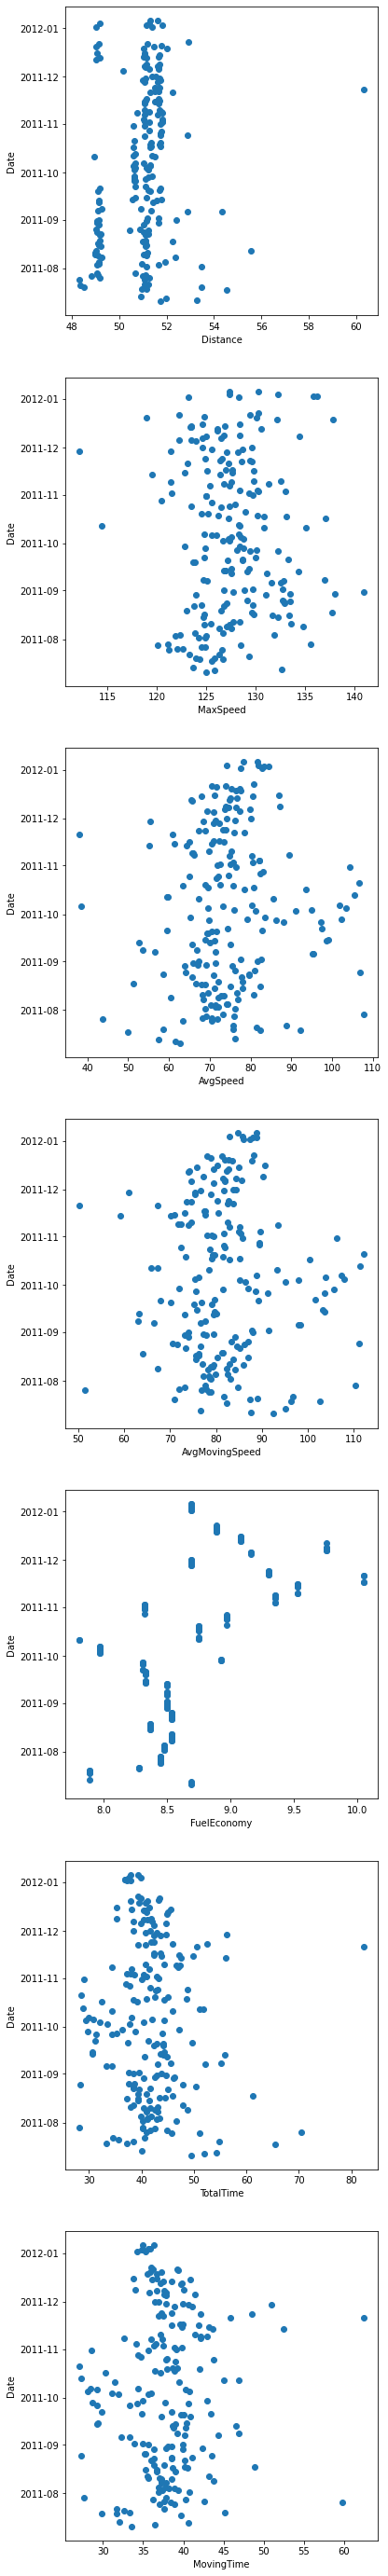

In [721]:
# Let's plot scatter plots of the values to visualize any outliers

# This is not a visualization course so don't worry 
# about how we plot the charts, we will review that in a different lecture

Fig, ax = plt.subplots(7, figsize=(6,50))

ax[0].scatter(x = df.Distance, y=df.Date)
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Date')

ax[1].scatter(x = df.MaxSpeed, y=df.Date)
ax[1].set_xlabel('MaxSpeed')
ax[1].set_ylabel('Date')

ax[2].scatter(x = df.AvgSpeed, y=df.Date)
ax[2].set_xlabel('AvgSpeed')
ax[2].set_ylabel('Date')

ax[3].scatter(x = df.AvgMovingSpeed, y=df.Date)
ax[3].set_xlabel('AvgMovingSpeed')
ax[3].set_ylabel('Date')

ax[4].scatter(x = df.FuelEconomy, y=df.Date)
ax[4].set_xlabel('FuelEconomy')
ax[4].set_ylabel('Date')

ax[5].scatter(x = df.TotalTime, y=df.Date)
ax[5].set_xlabel('TotalTime')
ax[5].set_ylabel('Date')

ax[6].scatter(x = df.MovingTime, y=df.Date)
ax[6].set_xlabel('MovingTime')
ax[6].set_ylabel('Date')


plt.show()

In [722]:
# display top 5 rows
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,2012-01-06,00:16:37,Friday,Home,51.29,127.4,78.3,84.8,8.69,39.3,36.3,No
1,2012-01-06,00:08:20,Friday,GSK,51.63,130.3,81.8,88.9,8.69,37.9,34.9,No
2,2012-01-04,00:16:17,Wednesday,Home,51.27,127.4,82.0,85.8,8.69,37.5,35.9,No
3,2012-01-04,00:07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,8.69,39.8,35.6,No
4,2012-01-03,00:18:57,Tuesday,Home,51.15,136.2,83.4,88.1,8.69,36.8,34.8,No


Let's calculate the z-score on our data

In [723]:
# calculate z-score of our data frame
from scipy import stats

z = stats.zscore(df)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

We get an error because the zscore could not be calcualted on the Timestamp datatypes
- So we select specific columns on which to calculate the zscore

In [ ]:
# calculate z-score of our dataframe on columns that contain numbers only
from scipy import stats

z = df.select_dtypes(include ='number').apply(stats.zscore)
print(np.where(z < 3))

In [ ]:
# replace the dataframe with the returned data by eliminating the values with zscore > 3
df = df[(z < 3).all(axis =1)]
df

In [ ]:
df.shape

### Review and verify the Data
Now we reivew our cleaned datafame and download it

In [724]:
df.isnull().sum()

Date              0
StartTime         0
DayOfWeek         0
GoingTo           0
Distance          0
MaxSpeed          0
AvgSpeed          0
AvgMovingSpeed    0
FuelEconomy       0
TotalTime         0
MovingTime        0
Take407All        0
dtype: int64

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            205 non-null    datetime64[ns]
 1   StartTime       205 non-null    object        
 2   DayOfWeek       205 non-null    object        
 3   GoingTo         205 non-null    object        
 4   Distance        205 non-null    float64       
 5   MaxSpeed        205 non-null    float64       
 6   AvgSpeed        205 non-null    float64       
 7   AvgMovingSpeed  205 non-null    float64       
 8   FuelEconomy     205 non-null    float64       
 9   TotalTime       205 non-null    float64       
 10  MovingTime      205 non-null    float64       
 11  Take407All      205 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 19.3+ KB


In [726]:
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,2012-01-06,00:16:37,Friday,Home,51.29,127.4,78.3,84.8,8.69,39.3,36.3,No
1,2012-01-06,00:08:20,Friday,GSK,51.63,130.3,81.8,88.9,8.69,37.9,34.9,No
2,2012-01-04,00:16:17,Wednesday,Home,51.27,127.4,82.0,85.8,8.69,37.5,35.9,No
3,2012-01-04,00:07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,8.69,39.8,35.6,No
4,2012-01-03,00:18:57,Tuesday,Home,51.15,136.2,83.4,88.1,8.69,36.8,34.8,No


### Download the new data as CSV

In [ ]:
# Downlaod the dataframe
df.to_csv('/Users/mac/Downloads/travel_times_cleaned.csv')